In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

**(1)** Функция косинуса с проихвольной частотой:

In [2]:
def cosinus(t, T):
    A = 2
    w = (2 * np.pi) / T

    return A * np.cos(w * t)

Реализация `DFT_slow` из методички Козулина

Чем ДПФ (DFT) отличается от БПФ (БДПФ, FFT): https://math.stackexchange.com/questions/30464/what-is-the-difference-between-the-discrete-fourier-transform-and-the-fast-fouri

In [3]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float) # Переводим временное пр-е сигнала в np.array
    N = x.shape[0] # Находим длину пр-я сигнала (сколько "точек" (сэмплов) в сигнале)
    n = np.arange(N) # Строим массив временных значений от начала до конца сигнала
    k = n.reshape((N, 1)) # Переводим n из вектор-строки в вектор-столбец
    M = np.exp(-2j * np.pi * k * n / N) # Матрица комплексных exp. ф-ий (REAL cos, IMAG. sin),
                                        # где каждая строка означает частоту в Гц,
                                        # а каждая строка -- временное значение сигнала.
    return np.dot(M, x) # Выполняем матричное умножение, чем домножаем каждую
                        # представленную в матрице компл. эксп. частоту на её
                        # "мощность" во временном пр-ии, заодно отрбасываем
                        # (*0) те частоты, которые в сигнале не представлены.

#cos_test = list(map(lambda a: cosinus(a, (1/10)), np.arange(0, 0.1, 0.01)))
#cos_test_dft = DFT_slow(cos_test)

Оценка времени вычисления **(1а)** и графики **(1б)**, <s>для 50 и 150 Гц соответственно</s>

Нужно совместить сигналы косинусоиды 50 и 150 Гц, и уже такой совмещённый сигнал <!--мучить-->анализировать

In [4]:
cos_time = np.arange(0, 0.2, 0.0001)

#cos_50hz = list(map(lambda a: cosinus(a, (1/50)), cos_time))
cos_50hz = [cosinus(a, 1/50) for a in cos_time]
#cos_150hz = list(map(lambda a: cosinus(a, (1/150)), cos_time))
cos_150hz = [cosinus(a, 1/150) for a in cos_time]

cos_values = np.add(cos_50hz, cos_150hz)

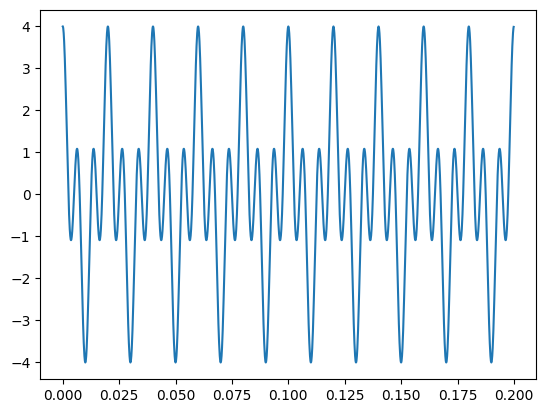

In [5]:
plt.plot(cos_time, cos_values)
plt.show()

In [6]:
print('Время вычисления DFT и FFT (соответственно):')
%timeit DFT_slow(cos_values)
%timeit np.fft.fft(cos_values)

Время вычисления DFT и FFT (соответственно):
702 ms ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
81.1 µs ± 10 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Если выше появляется `The slowest run took %d times longer than the fastest…`, то результат неверный, надо провести оценку ещё раз

In [7]:
def compare_DFT_FFT(time, freq, val, dft, fft, upscale=1):
    dft_ifft = np.fft.ifft(dft)
    fft_ifft = np.fft.ifft(fft)
    dft_err = np.subtract(dft_ifft, val)
    fft_err = np.subtract(fft_ifft, val)

    plt.figure(figsize=(12, 8))
    plt.suptitle('Разница между DFT (слева) и FFT (справа), и их точность относительно ориг. функции')

    plt.subplot(2, 2, 1)
    plt.plot(freq[0:len(freq)//(2*upscale)], np.abs(dft[0:len(freq)//(2*upscale)]))

    plt.subplot(2, 2, 2)
    plt.plot(freq[0:len(freq)//(2*upscale)], np.abs(dft[0:len(freq)//(2*upscale)]))

    plt.subplot(2, 2, 3)
    plt.plot(time, dft_err)

    plt.subplot(2, 2, 4)
    plt.plot(time, fft_err)
    
    plt.show()

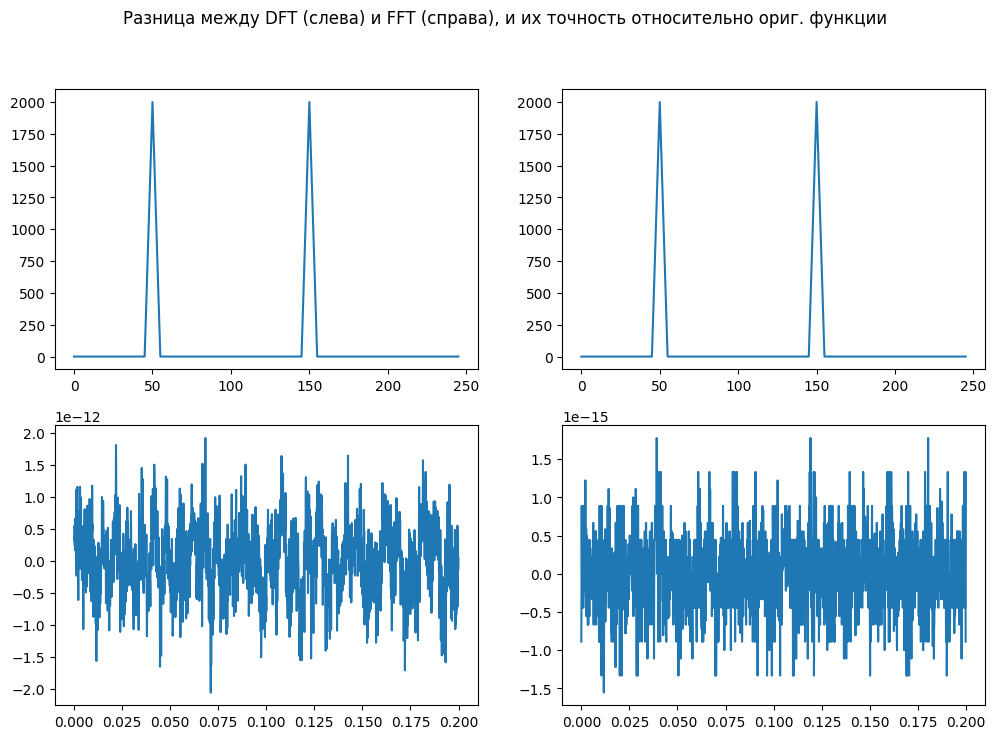

In [34]:
cos_frequencies = np.fft.fftfreq(len(cos_time), d=0.0001)
cos_dft = DFT_slow(cos_values)
#cos_dft_ifft = np.fft.ifft(cos_dft)
#cos_dft_err = np.subtract(cos_dft_ifft, cos_values)
cos_fft = np.fft.fft(cos_values)
#cos_fft_ifft = np.fft.ifft(cos_fft)
#cos_fft_err = np.subtract(cos_fft_ifft, cos_values)

compare_DFT_FFT(cos_time, cos_frequencies, cos_values, cos_dft, cos_fft, 20)

**(1в)** Теперь зашумим этот сигнал и посмотрим, как он изменится:

In [9]:
cos_fft_noisy = cos_fft + np.random.normal(0, 10, cos_time.shape) # 1 из условий слишком мало

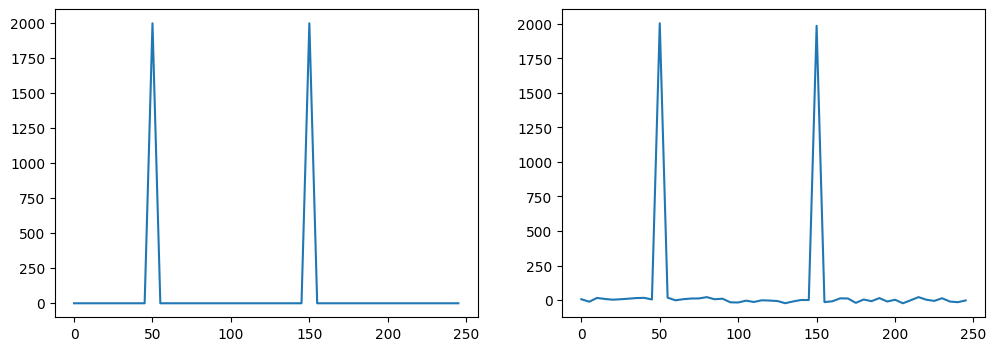

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cos_frequencies[0:len(cos_frequencies)//40], cos_fft[0:len(cos_frequencies)//40])

plt.subplot(1, 2, 2)
plt.plot(cos_frequencies[0:len(cos_frequencies)//40], cos_fft_noisy[0:len(cos_frequencies)//40])

plt.show()

In [11]:
cos_ifft = np.fft.ifft(cos_fft)
cos_ifft_noisy = np.fft.ifft(cos_fft_noisy)

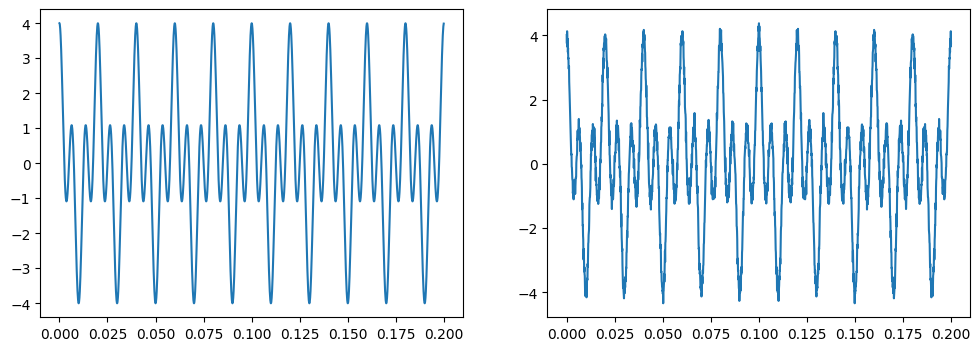

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cos_time, cos_ifft)

plt.subplot(1, 2, 2)
plt.plot(cos_time, cos_ifft_noisy)

plt.show()

<!-- а ведь когда-нибудь я перестану ложиться спать не раньше половины четвёртого ночи... эх -->

<!-- ## **TODO: 2 и 3**

Алсо, стоит разобраться, что означает y-шкала у последних 4 графиков (выше) и почему она отличается от y-шкалы на графиках ниже. -->

**(2)** Проделаем аналогичные операции с фукнцией периодического прямоугольного испульса:

In [13]:
def periodic_impulse(t, T):
    A = 2

    if t % T > T/2:
        return A

    return -A

In [20]:
impulse_time = np.arange(0, 4, 0.001)
#impulse_values = list(map(lambda a: periodic_impulse(a, 2), impulse_time))
impulse_values = [periodic_impulse(a, 2) for a in impulse_time]

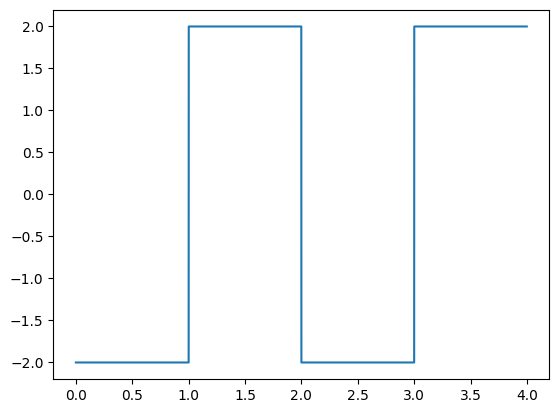

In [22]:
plt.plot(impulse_time, impulse_values)
plt.show()

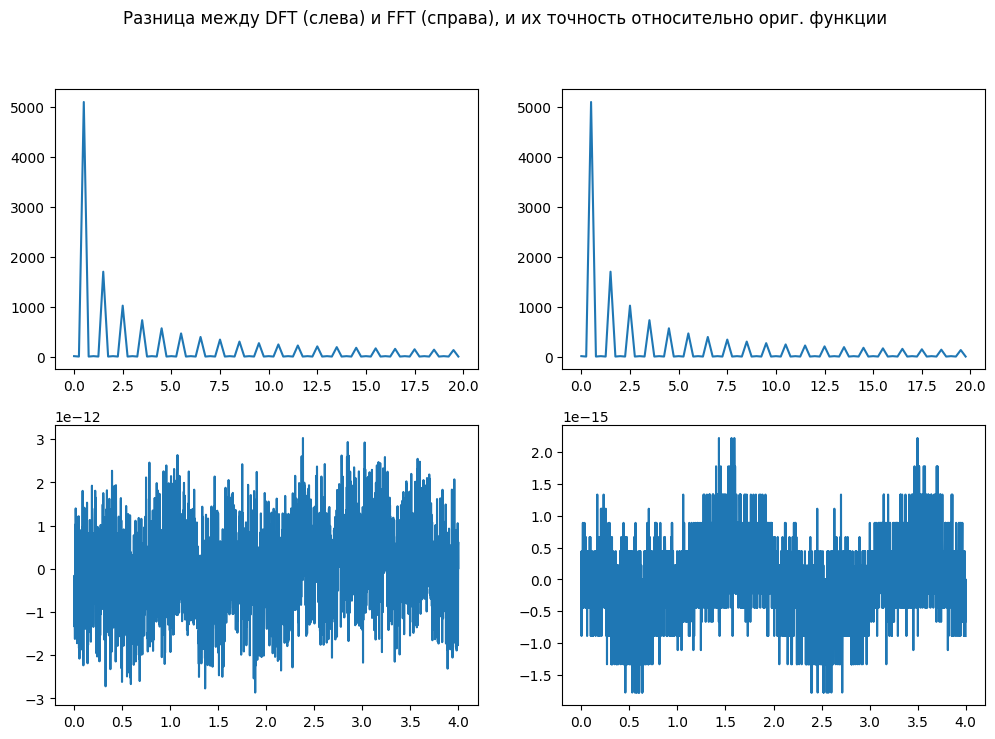

In [23]:
impulse_frequencies = np.fft.fftfreq(len(impulse_time), 0.001)
impulse_dft = DFT_slow(impulse_values)
impulse_fft = np.fft.fft(impulse_values)

compare_DFT_FFT(impulse_time, impulse_frequencies, impulse_values, impulse_dft, impulse_fft, 25)

In [24]:
impulse_noisy = impulse_values + np.random.normal(0, 1, impulse_time.shape)

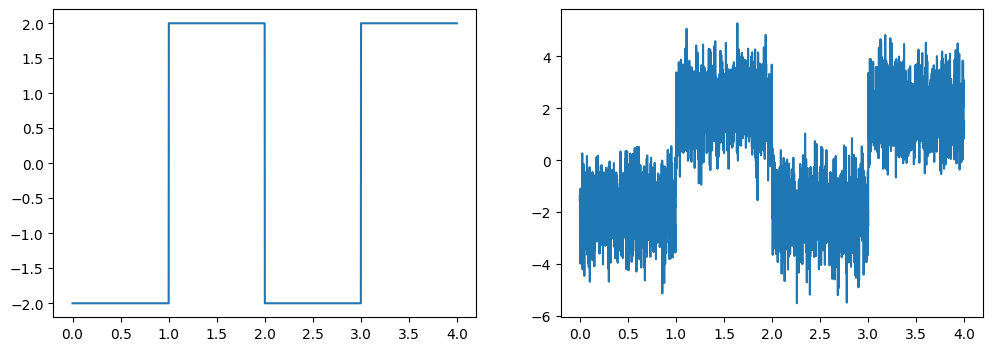

In [25]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(impulse_time, impulse_values)

plt.subplot(1, 2, 2)
plt.plot(impulse_time, impulse_noisy)

plt.show()

In [26]:
impulse_fft = np.fft.fft(impulse_values)
impulse_noisy_fft = np.fft.fft(impulse_noisy)

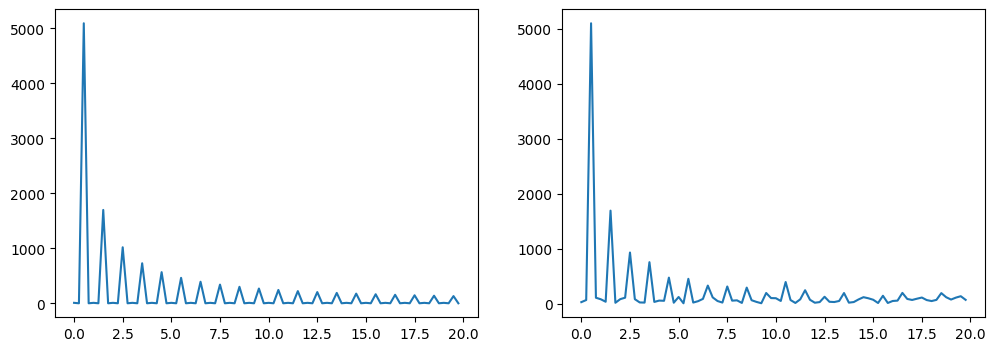

In [27]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(impulse_frequencies[0:len(impulse_frequencies)//50], np.abs(impulse_fft[0:len(impulse_frequencies)//50]))

plt.subplot(1, 2, 2)
plt.plot(impulse_frequencies[0:len(impulse_frequencies)//50], np.abs(impulse_noisy_fft[0:len(impulse_frequencies)//50]))

plt.show()

**(3)** Реализация БДПФ по методичке (стр. 63-64) :(

In [28]:
def DFT_fast_RotK(k, N): # Угловой кофецент
    return np.exp(-1j * ((2 * np.pi * k) / N))

In [29]:
# Тут мы по сути делаем выч-е одного и того же вида, две
# различные функции просто для соответствия с методичкой...

def DFT_fast_X0(k, N, x0): # Для чётных x (x0); X0(k) по ф. 14 
    summa = 0
    for m in range(N//2):
        summa += x0[m] * DFT_fast_RotK(m*k, N//2)

    return summa

def DFT_fast_X1(k, N, x1): # Для нечётных x (x1); X1(k) по ф. 14 
    summa = 0
    for m in range((N//2)):
        summa += x1[m] * DFT_fast_RotK(m*k, N//2)

    return summa

In [30]:
def DFT_fast(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0] # Находим длину пр-я сигнала
    n = np.arange(N) # Строим массив временных значений

    # if (np.log2(N) - int(np.log2(N)) > 0):
    #     x = np.append(x, np.zeros(2 ** int(np.log2(N)+1) - N), axis=0)
    #     print(f'Длина сигнала приведена от {N} к {x.shape[0]}')
    #     N = x.shape[0]

    # Идея ускорения вычислений в том, что W^{k + N/2} ​= −W^{k},
    # т.е. в том, что эксп-ые кофеценты обладают симметрией,
    # а значит, мы можем сэкономить на завязанных на W выч-ях.

    # Выполняем разделение x на чёт/нечёт
    x0 = []
    x1 = []
    for k in range(N):
        if (k % 2 == 0):
            x0.append(x[k])
        else:
            x1.append(x[k])
    
    # Вычисляем значения отдельно для ч́ёт, отдельно для нечёт
    if (N % 2 == 0): # Рекурсивно разделяем на чёт/нечёт снова и снова,
                     # если разбиение возможно (т.е. длина чётная):
        X0 = DFT_fast(x0)
        X1 = DFT_fast(x1)
    else: # Если длина нечётная и разбиение применить ннельзя,
          # честно считаем все значения чётных и нечётных x:
        X0 = []
        X1 = []
        for k in range(N//2):
            X0.append(DFT_fast_X0(k, N, x0))
            X1.append(DFT_fast_X1(k, N, x1))

    # Теперь выполняем объединение чёт и нечёт значений
    X = np.zeros(N, dtype=complex)
    for k in range(N//2):
        X[k] = X0[k] + DFT_fast_RotK(k, N) * X1[k] # X(k) по ф. 13
        X[k + N//2] = X0[k] - DFT_fast_RotK(k, N) * X1[k] # X(k + N/2) по ф. 13
    
    return X

In [31]:
#cos_fft_fast = DFT_fast(cos_50hz)
#cos_fft_fast = DFT_fast(list(map(lambda a: cosinus(a, (1/50)), np.arange(0, 1, (1/1000)))))

In [32]:
test_cos_best = [cosinus(a, 1/50) for a in np.arange(0, 4, (1/2048))]
test_cos_real = [cosinus(a, 1/50) for a in np.arange(0, 4, (1/2000))]

print('Время вычисления через DFT_slow, np.fft и DFT_fast для идеального случая:')
%timeit DFT_slow(test_cos_best)
%timeit np.fft.fft(test_cos_best)
%timeit DFT_fast(test_cos_best)

print('\nВремя вычисления через DFT_slow, np.fft и DFT_fast для типичного случая:')
%timeit DFT_slow(test_cos_real)
%timeit np.fft.fft(test_cos_real)
%timeit DFT_fast(test_cos_real)

Время вычисления через DFT_slow, np.fft и DFT_fast для идеального случая:
16.2 s ± 977 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.22 ms ± 69 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
721 ms ± 124 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Время вычисления через DFT_slow, np.fft и DFT_fast для типичного случая:
14.2 s ± 400 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.12 ms ± 23.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.47 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


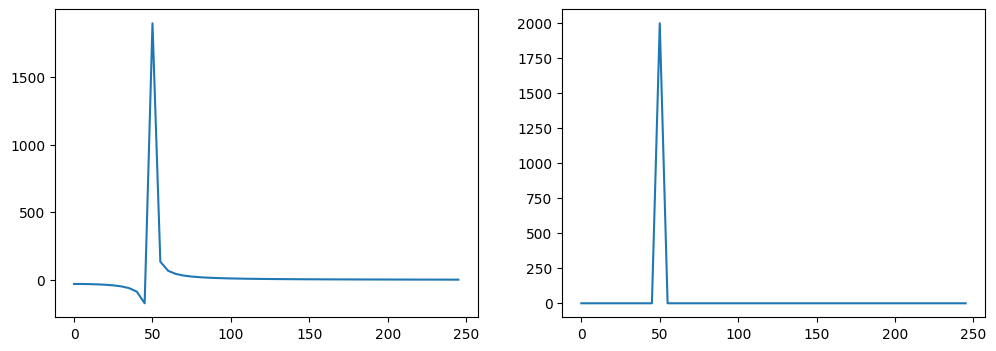

In [33]:
cos_50hz_dft_fast = DFT_fast(cos_50hz)
cos_50hz_fft = np.fft.fft(cos_50hz)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cos_frequencies[0:len(cos_frequencies)//40], cos_50hz_dft_fast[0:len(cos_frequencies)//40])

plt.subplot(1, 2, 2)
plt.plot(cos_frequencies[0:len(cos_frequencies)//40], cos_50hz_fft[0:len(cos_frequencies)//40])

plt.show()